<a href="https://colab.research.google.com/github/arifrhm/Talent_Connect_BI_Complement_Time_Series_Analysis_Python/blob/main/Advanced_Class_DS_BI_B2_Day_12_Time_Series_Forecasting_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Load Packages

In [ ]:
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
    ExpandingWindowSplitter,
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

# Load Dataset

In [ ]:
google_stocks = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/google_stocks_data/google_stock.csv")

air_passengers = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/air_passanger_data/AirPassengers.csv")

# Preprocess Data

**Google Stocks Data**

In [ ]:
# check the first 5 rows
google_stocks.head()

,index,value
0,1,392.830017
1,2,392.512085
2,3,397.305908
3,4,398.011322
4,5,400.490204


In [ ]:
# check data structure
google_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   200 non-null    int64  
 1   value   200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


**Air Passengers Data**

In [ ]:
# check the first 5 rows
air_passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# check data structure
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# change month column to date type
air_passengers['Month'] = pd.to_datetime(air_passengers['Month'], format="%Y-%m")

In [ ]:
# renaming certain column
air_passengers = air_passengers.rename(columns={
    "#Passengers": "Total Passengers",
    "Month": "Date"
})

In [ ]:
# set Date as index
air_passengers = air_passengers.set_index('Date')
air_passengers.index = pd.PeriodIndex(air_passengers.index, freq = 'M')

In [ ]:
# check the first 5
air_passengers.head()

,Total Passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
# check data structure
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Forecasting: Naive Model

**Google Stocks**

## Exploration

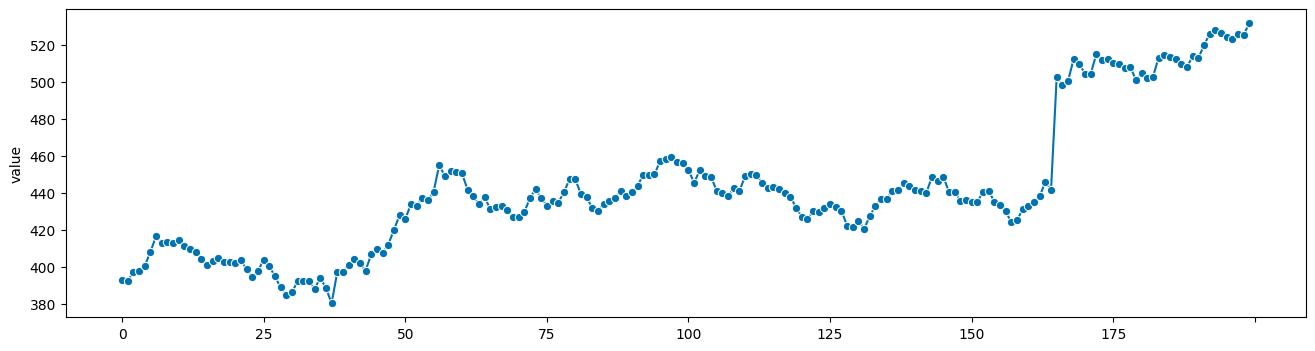

In [ ]:
plot_series(google_stocks['value']);

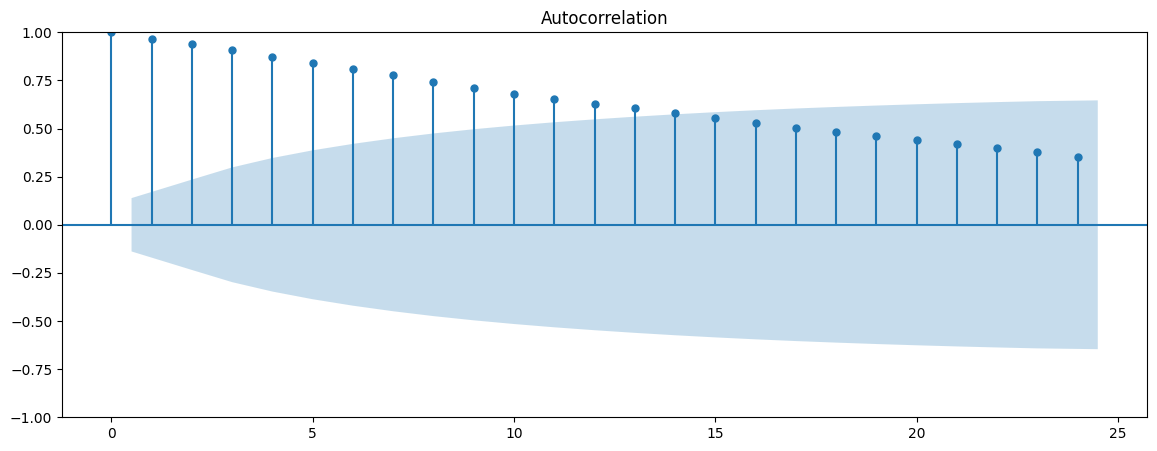

In [ ]:
plot_acf(google_stocks['value']).set_size_inches((14,5));

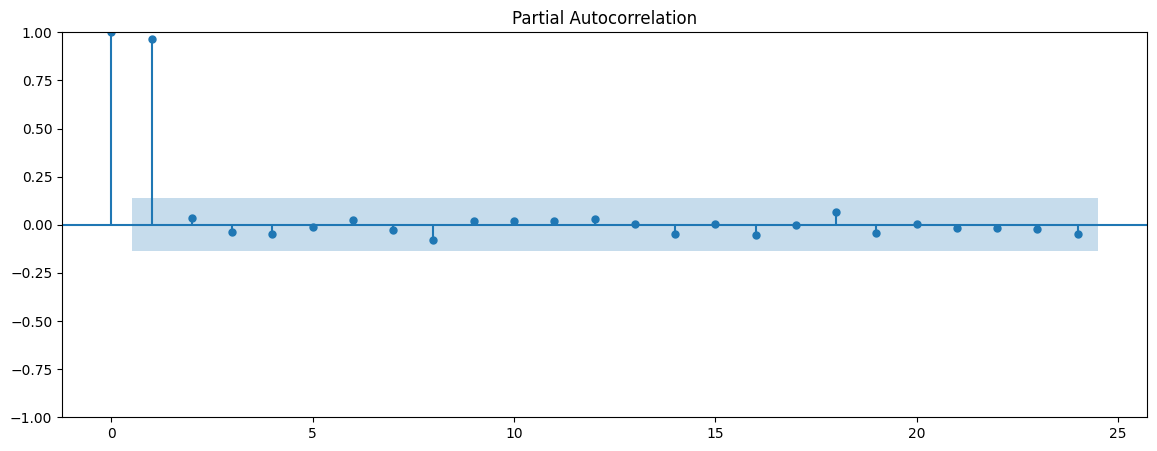

In [ ]:
plot_pacf(google_stocks['value']).set_size_inches((14,5));

## Modeling

**Train-Test Split**

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(google_stocks['value'], test_size=30)

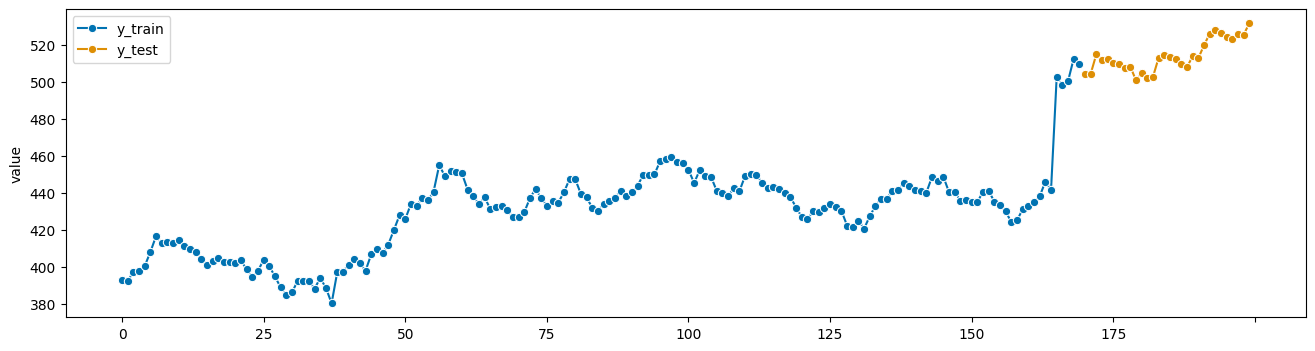

In [ ]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
fh

ForecastingHorizon([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
            183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
            196, 197, 198, 199],
           dtype='int64', is_relative=False)

**Modeling**

In [ ]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

In [ ]:
# fit model to train data
naive_forecaster.fit(y = y_train)

NaiveForecaster()

**Prediction**

In [ ]:
y_pred = naive_forecaster.predict(fh)

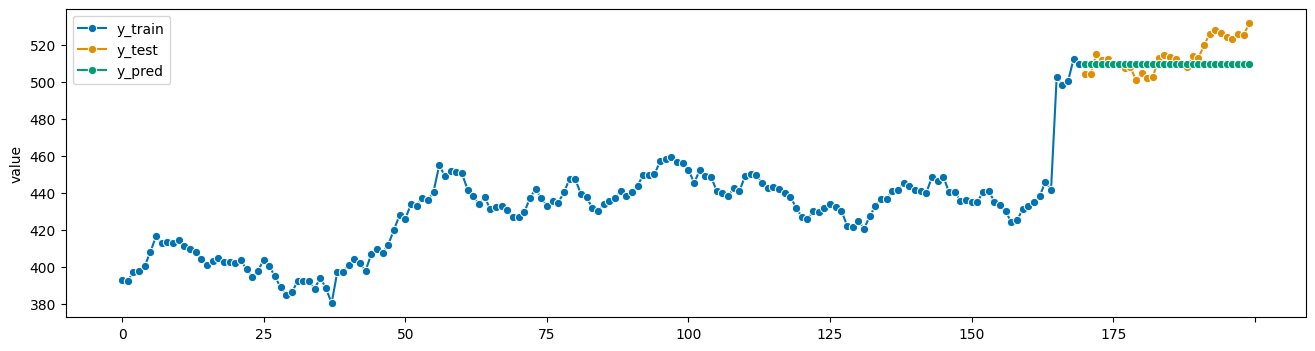

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

## Diagnostics

**Normality of residuals**

In [ ]:
# find residuals
residuals = y_test - y_pred

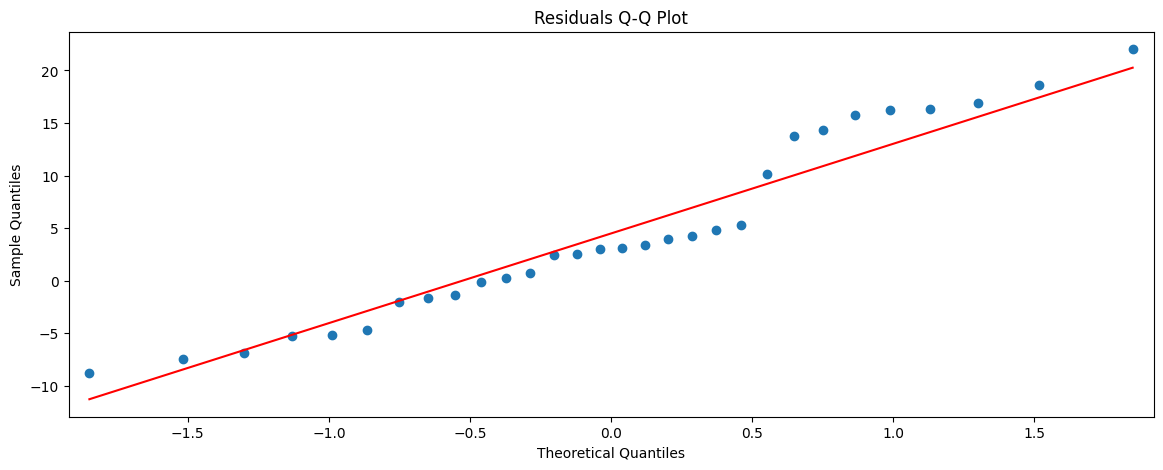

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

**Residual Random Walk Pattern**

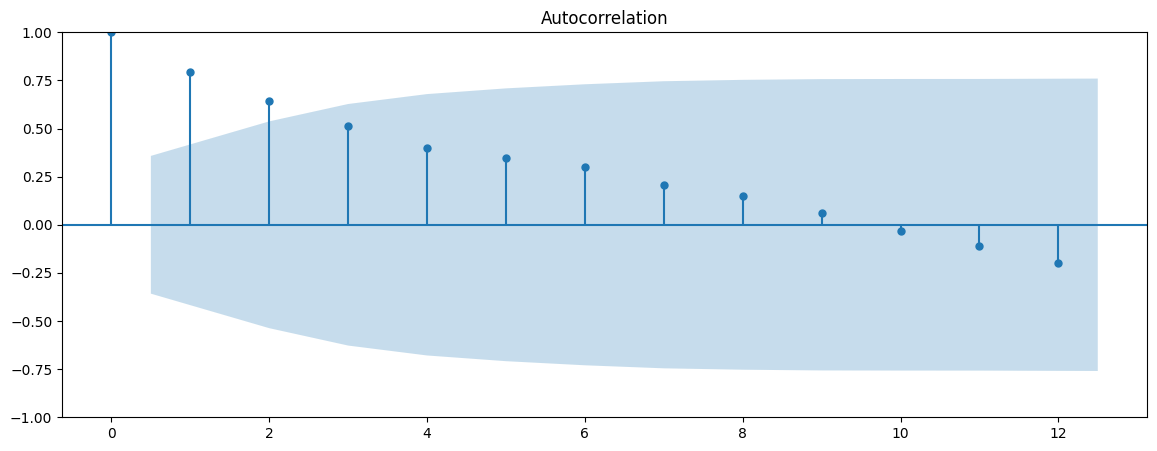

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

**Autocorrelation Test using Ljung-Box Test**

- *Null hypothesis*: The residuals are independently distributed.
- *Alternate hypothesis*: The residuals are not independently distributed; they exhibit serial correlation.

Reject null hypothesis if **p-value less than 5%**



In [ ]:
sm.stats.acorr_ljungbox(residuals, lags = 10, return_df=True)

,lb_stat,lb_pvalue
1,20.739294,5.262498e-06
2,34.821127,2.745923e-08
3,44.162705,1.393728e-09
4,50.101684,3.438581e-10
5,54.700350,1.504415e-10
6,58.333362,9.807840e-11
7,60.097475,1.443396e-10
8,61.070075,2.873203e-10
9,61.247585,7.702240e-10
10,61.299977,2.055268e-09


**Interpretation**: Because p-value less than 5%, then we can reject the null hypothesis of the test and conclude that the residuals are not independent.

## Model Evaluation

**Mean Absolute Error**

In [ ]:
mean_absolute_error(y_test, y_pred)

7.37701636666666

**Mean Squared Error**

In [ ]:
mean_squared_error(y_test, y_pred)

92.92279578801832

**Root Mean Square Error**

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.639647077980516

**Mean Absolute Percentage Error**

In [ ]:
mean_absolute_percentage_error(y_test, y_pred) * 100

1.420026467391403

## Cross-Validation

In [ ]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

In [ ]:
# define CV object
cv = ExpandingWindowSplitter(
    initial_window = 100,
    step_length = 10,
    fh = [1, 2, 3, 4, 5,6,7,8,9,10]
)

In [ ]:
results = evaluate(forecaster=naive_forecaster, y=y_train, cv=cv, strategy="refit", return_data=True)

In [ ]:
# check results from CV
results

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred
0,0.025448,0.002617,0.017528,100,99,0 392.830017 1 392.512085 2 397.30...,100 452.397583 101 445.403076 102 452...,100 456.307159 101 456.307159 102 456...
1,0.011015,0.001805,0.018909,110,109,0 392.830017 1 392.512085 2 397...,110 449.188477 111 450.355865 112 449...,110 441.006683 111 441.006683 112 441...
2,0.009434,0.002941,0.016616,120,119,0 392.830017 1 392.512085 2 397...,120 427.052429 121 425.686310 122 430...,120 432.094635 121 432.094635 122 432...
3,0.031338,0.003049,0.015751,130,129,0 392.830017 1 392.512085 2 397...,130 424.951111 131 420.713654 132 427...,130 421.533325 131 421.533325 132 421...
4,0.009614,0.002762,0.014447,140,139,0 392.830017 1 392.512085 2 397...,140 441.662415 141 441.011658 142 440...,140 443.644531 141 443.644531 142 443...
5,0.011523,0.002805,0.014458,150,149,0 392.830017 1 392.512085 2 397...,150 435.363373 151 435.124939 152 440...,150 436.24762 151 436.24762 152 436.2...
6,0.081075,0.002803,0.014235,160,159,0 392.830017 1 392.512085 2 397...,160 433.177612 161 435.224274 162 438...,160 431.314728 161 431.314728 162 431...


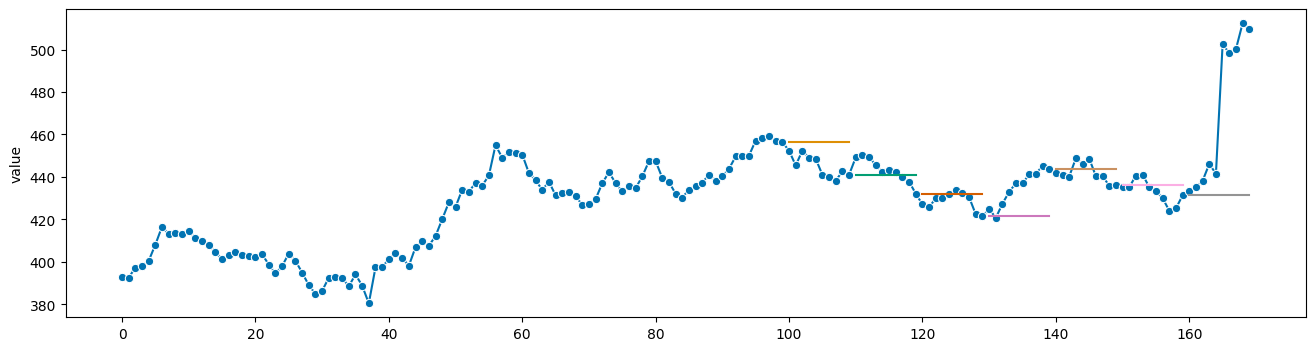

In [ ]:
# plot CV results
plot_series(
    y_train,
    results["y_pred"].iloc[0],
    results["y_pred"].iloc[1],
    results["y_pred"].iloc[2],
    results["y_pred"].iloc[3],
    results["y_pred"].iloc[4],
    results["y_pred"].iloc[5],
    results["y_pred"].iloc[6],
    markers=["o", "", "", "", "", "", "", ""]
);

## Task

Create the same model for air passengers data, don't forget to cross-validate it!

# ARIMA Model

## Exploration

**Air Passengers**

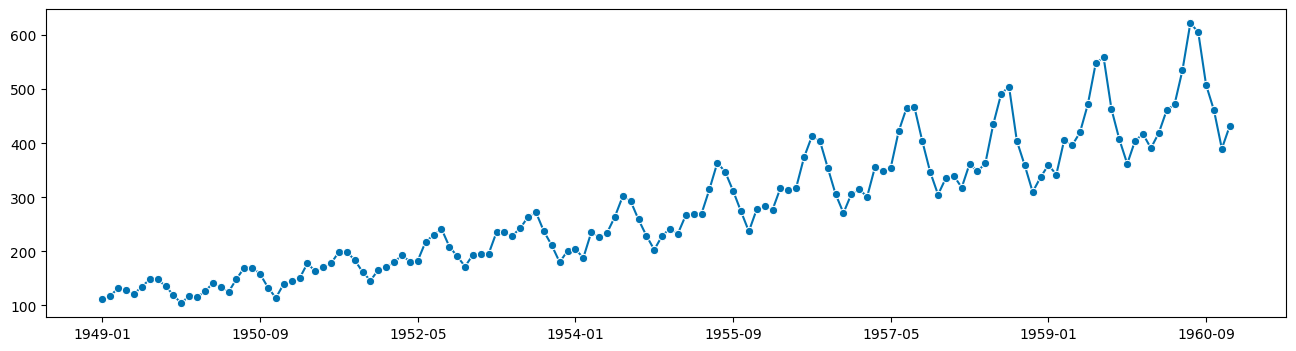

In [ ]:
# plot time series data
plot_series(air_passengers);

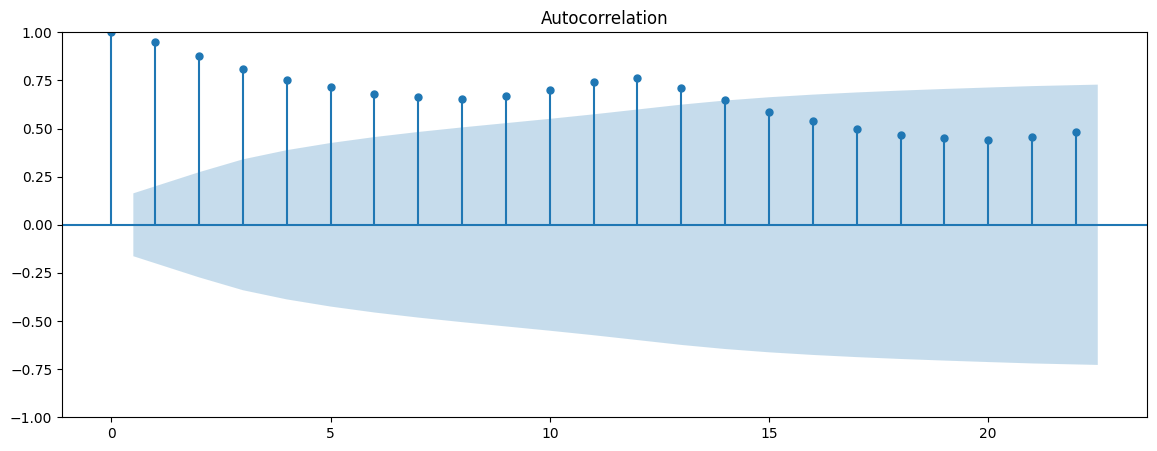

In [ ]:
# plot ACF
plot_acf(air_passengers).set_size_inches((14,5));

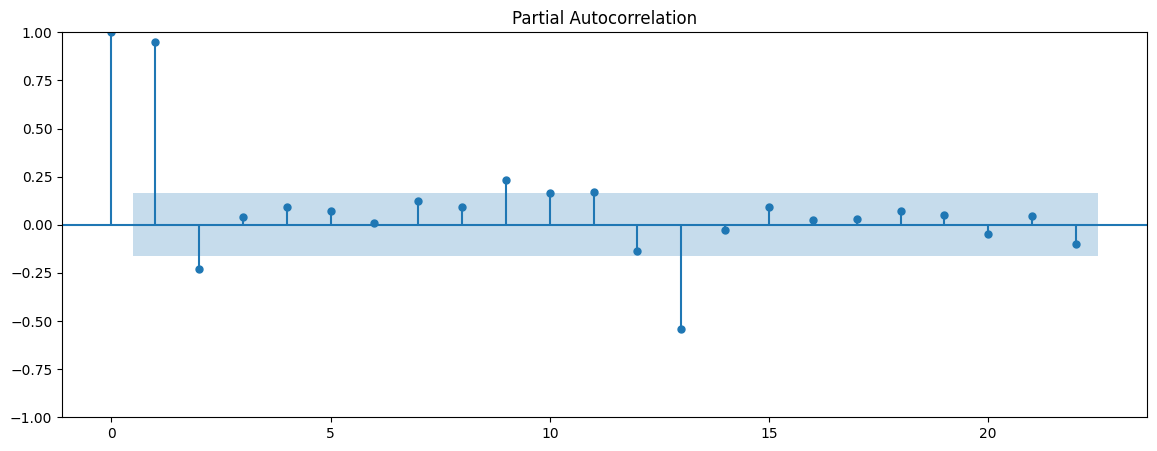

In [ ]:
# plot PACF
plot_pacf(air_passengers).set_size_inches((14,5));

**Differenced Version of Air Passengers Data**

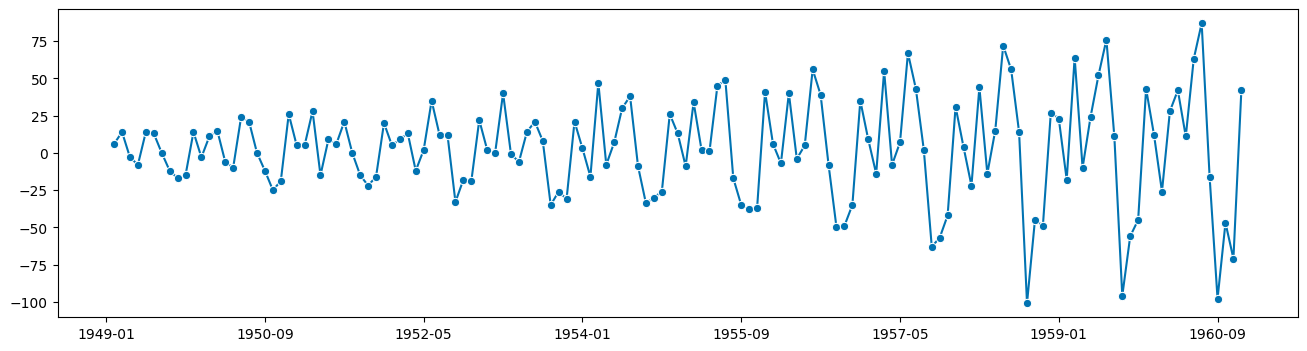

In [ ]:
# plot time series data
plot_series(air_passengers.diff());

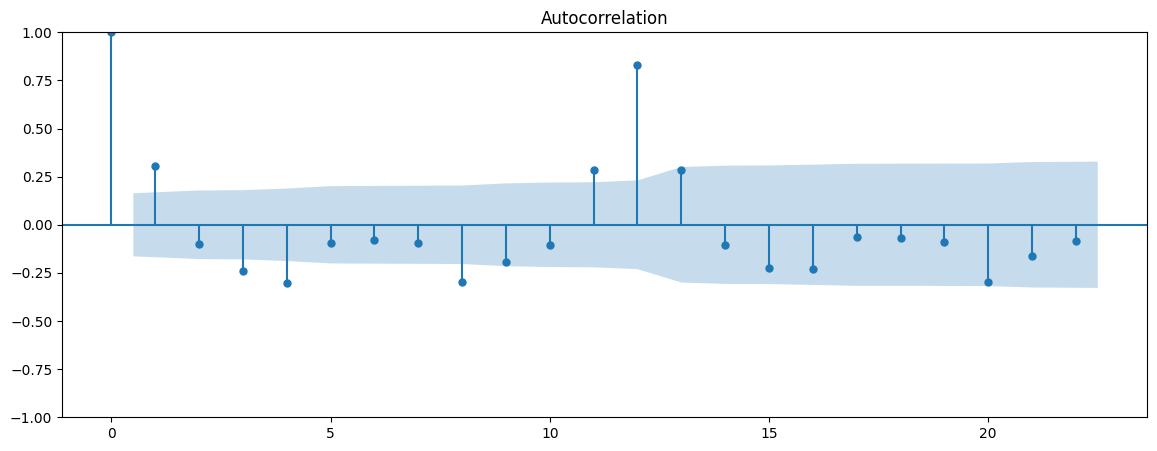

In [ ]:
# plot ACF
plot_acf(air_passengers.diff().dropna()).set_size_inches((14,5));

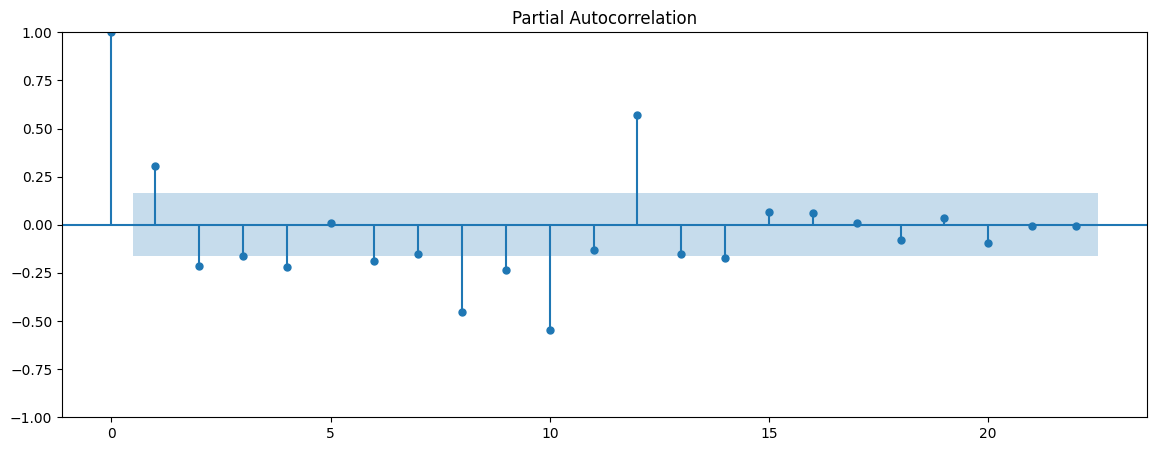

In [ ]:
# plot PACF
plot_pacf(air_passengers.diff().dropna()).set_size_inches((14,5));

**Log-transformed Version of Air Passengers Data**

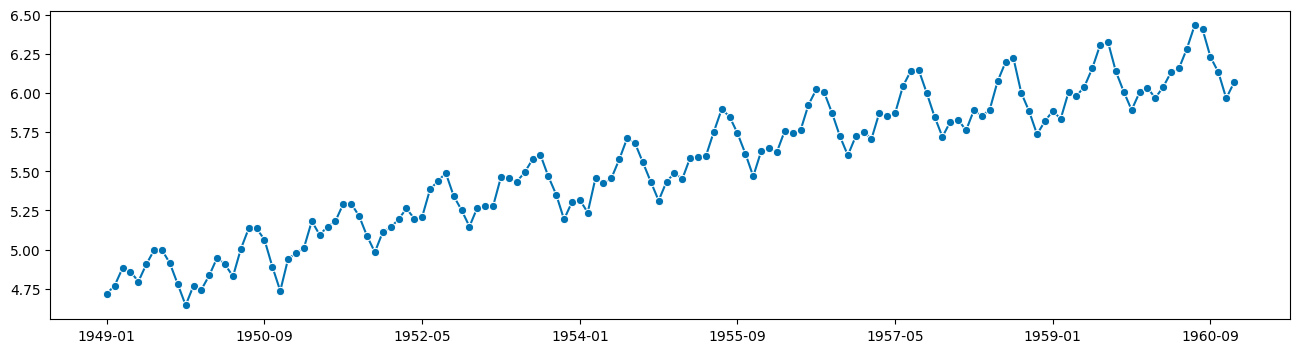

In [ ]:
# plot time series data
plot_series(np.log(air_passengers));

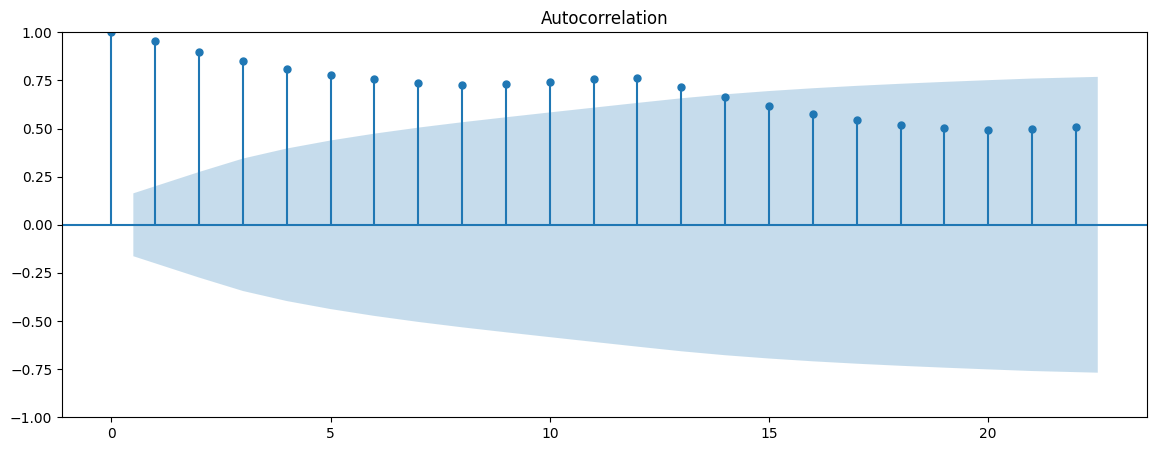

In [ ]:
# plot ACF
plot_acf(np.log(air_passengers)).set_size_inches((14,5));

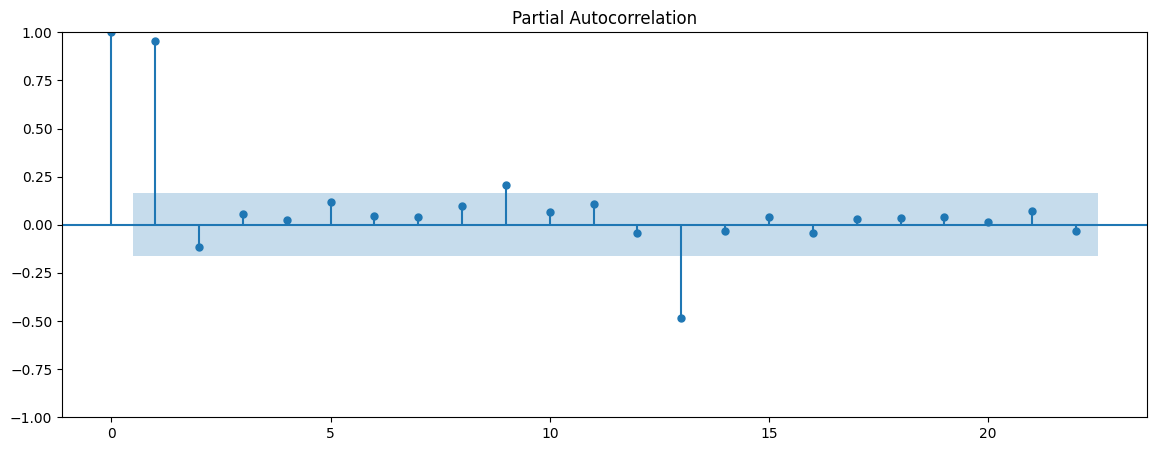

In [ ]:
# plot PACF
plot_pacf(np.log(air_passengers)).set_size_inches((14,5));

## Modeling

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(air_passengers, test_size=36)

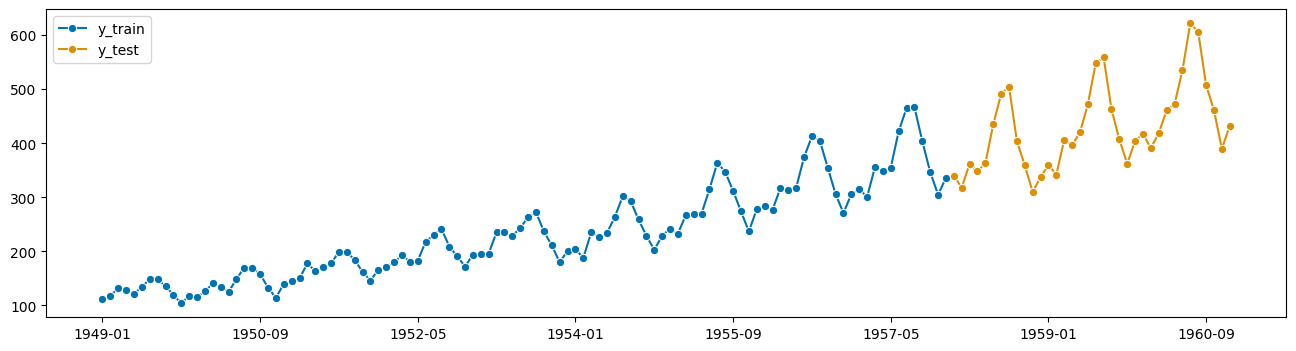

In [ ]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
fh

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

**Modeling**

In [ ]:
# define arima forecaster model
arima_forecaster = AutoARIMA(sp=12, suppress_warnings=True, random_state = 1000)

In [ ]:
# fit forecaster to train data
arima_forecaster.fit(y_train)

AutoARIMA(random_state=1000, sp=12, suppress_warnings=True)

**Prediction**

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_arima = arima_forecaster.predict(fh=fh)

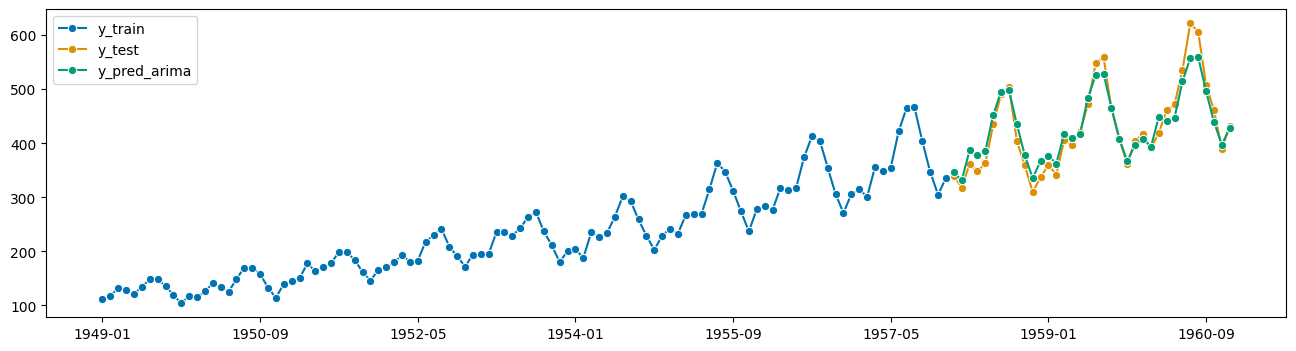

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, labels=["y_train", "y_test", "y_pred_arima"]);

**Check Model Specs**

In [ ]:
arima_forecaster.get_fitted_params()

{'ar.L1': -0.2411177593160947,
 'sigma2': 92.74985957133522,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679025909,
 'aicc': 704.1316026851996,
 'bic': 709.108921685792,
 'hqic': 706.0650836395923}

In [ ]:
arima_forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Fri, 25 Aug 2023   AIC                            704.001
Time:                                    03:51:55   BIC                            709.109
Sample:                                01-31-1949   HQIC                           706.065
                                     - 12-31-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model Diagnostics

In [ ]:
# find residuals
residuals = y_test - y_pred_arima

**Plot Residuals**

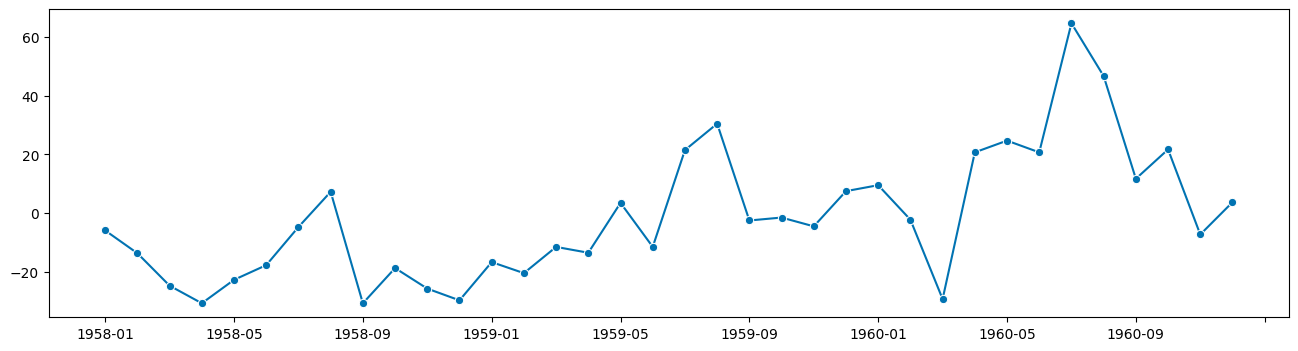

In [ ]:
plot_series(residuals);

**Normality of Residuals**

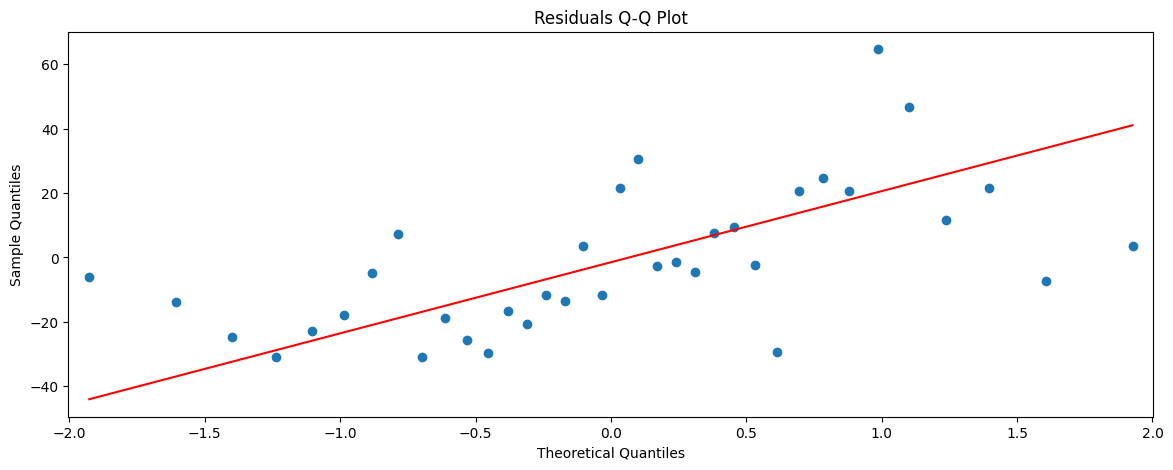

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total Passengers', ylabel='Count'>

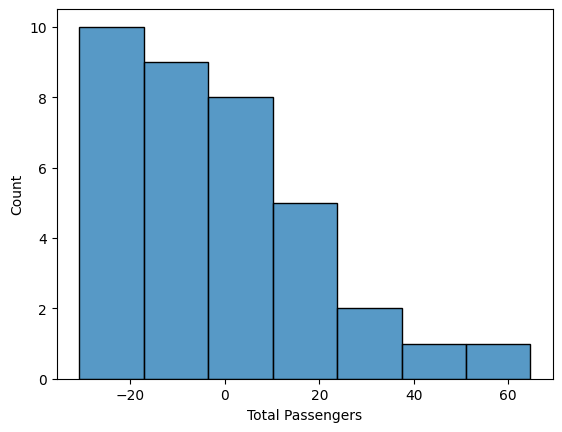

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

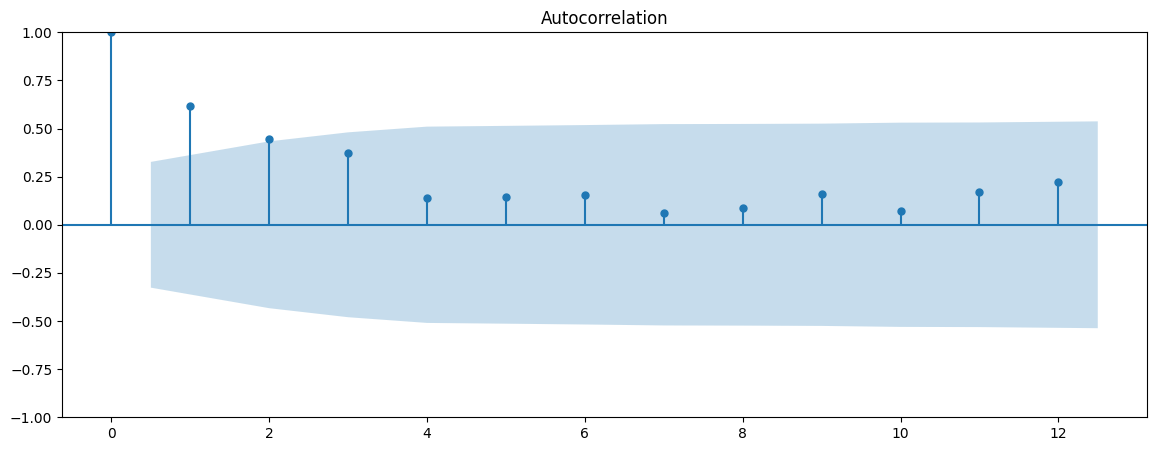

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_arima) * 100

4.148971434138201

# Exponential Smoothing

## Modeling

In [ ]:
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)

In [ ]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

ExponentialSmoothing(seasonal='multiplicative', sp=12, trend='add')

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

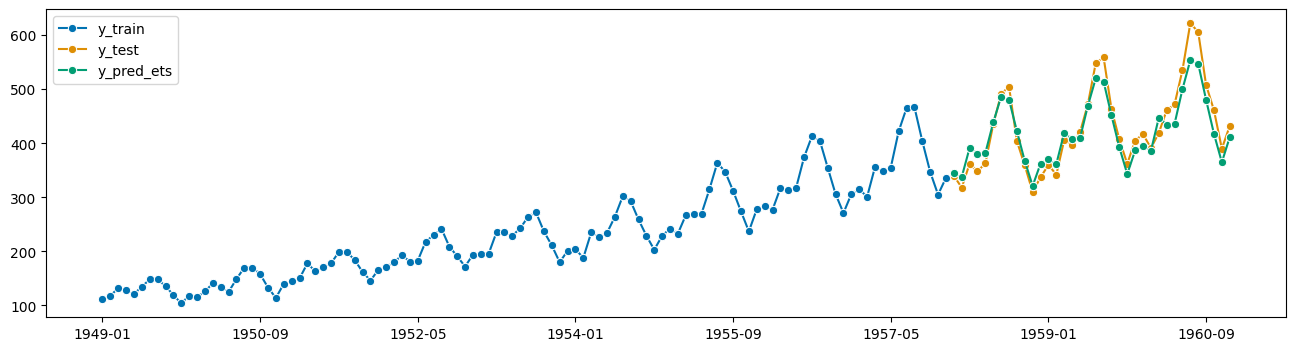

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_ets, labels=["y_train", "y_test", "y_pred_ets"]);

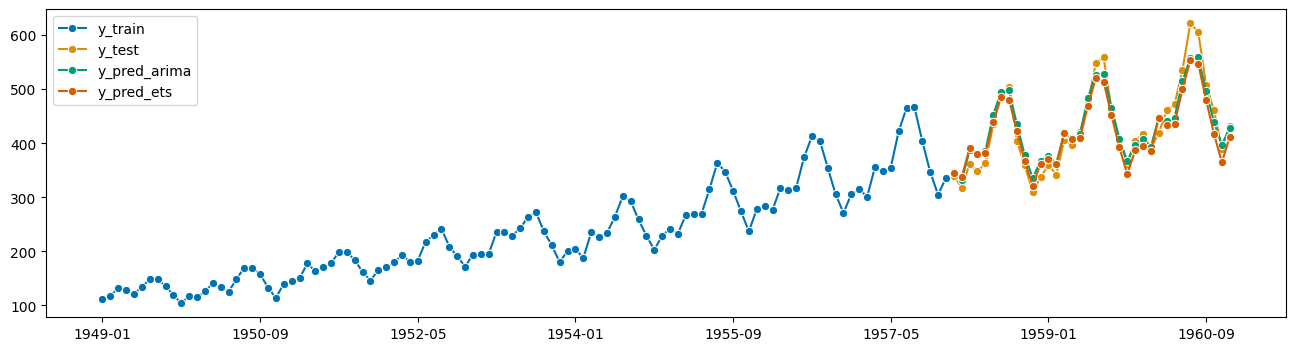

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, y_pred_ets, labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets"]);

**Check Model Specs**

In [ ]:
ets_forecaster.get_fitted_params()

{'initial_level': 77.23670059068363,
 'initial_slope': None,
 'initial_seasons': array([1.43861996, 1.39635093, 1.60943739, 1.55643601, 1.55314472,
        1.77220004, 1.95329423, 1.92080428, 1.67774264, 1.45028462,
        1.26147836, 1.41432164]),
 'aic': 449.1269163465245,
 'bic': 492.04101598051204,
 'aicc': 456.8123096049515}

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_ets

**Plot Residuals**

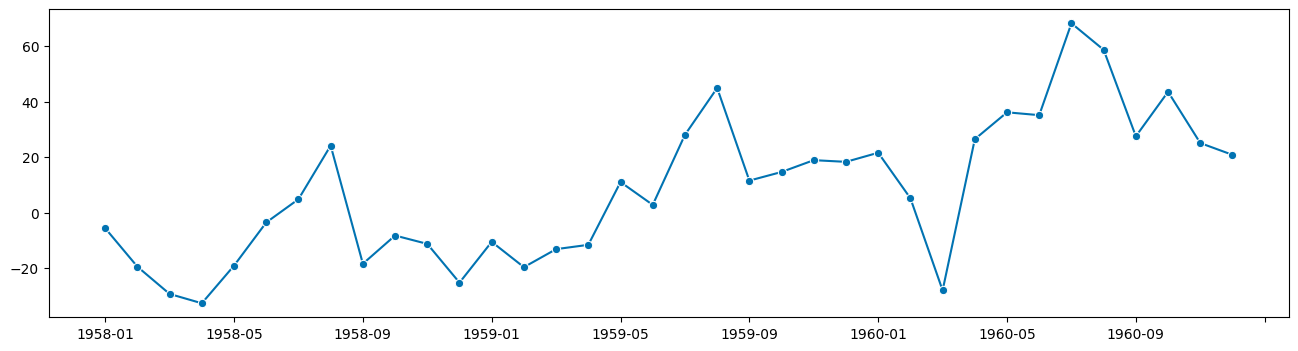

In [ ]:
plot_series(residuals);

**Normality of Residuals**

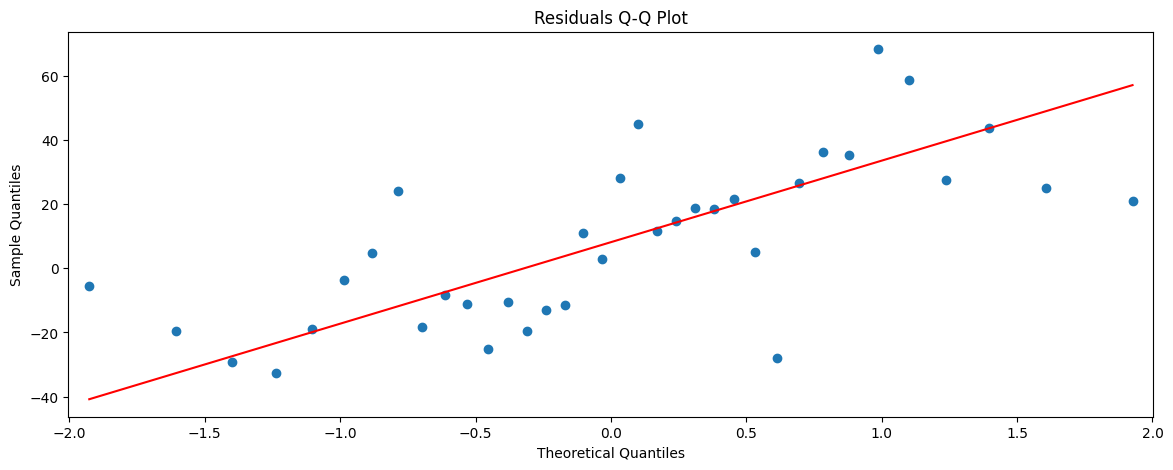

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total Passengers', ylabel='Count'>

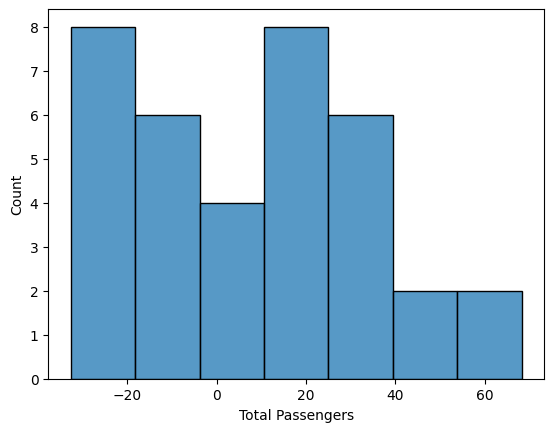

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Randon Walk Pattern of Residuals**

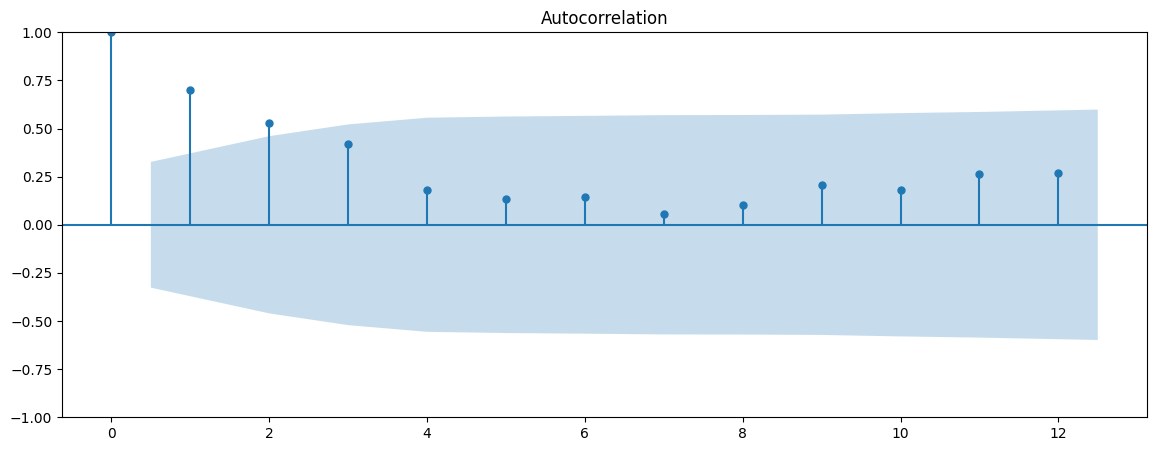

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

****

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

5.056484561299069

# AutoETS

## Modeling

In [ ]:
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=12)

In [ ]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

AutoETS(auto=True, sp=12)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

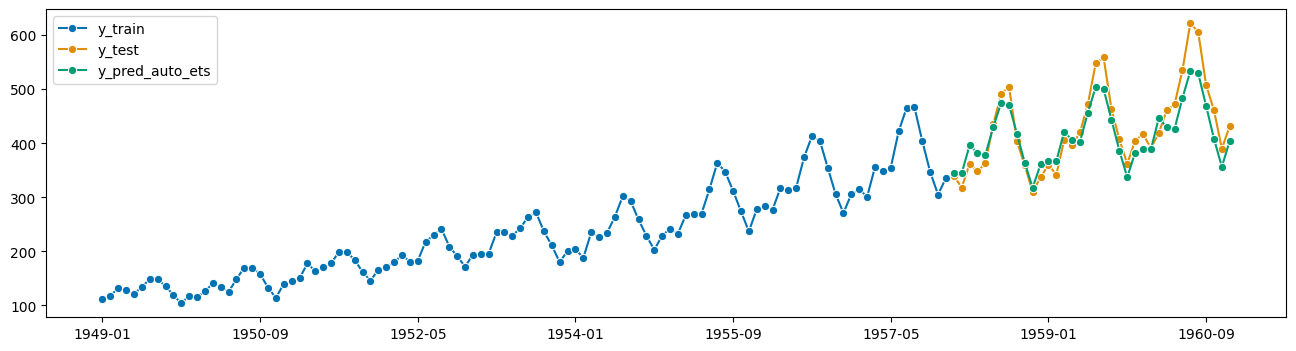

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

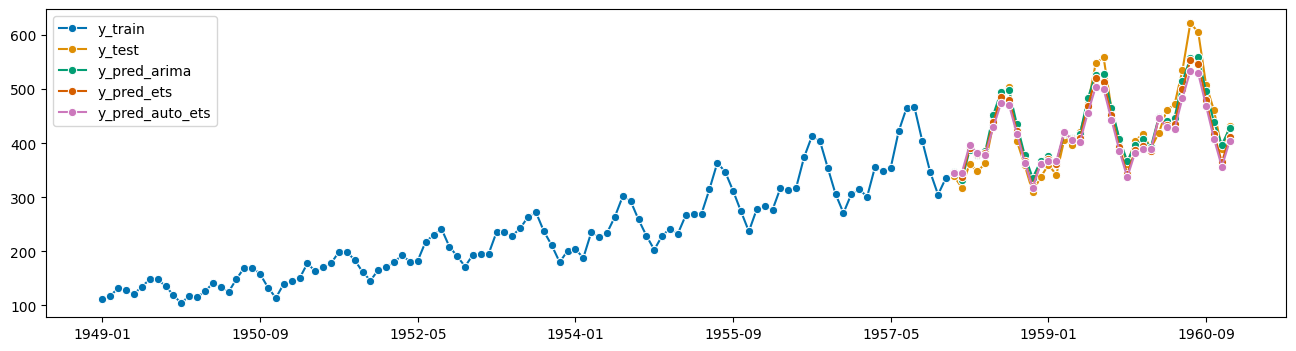

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets"]);

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_auto_ets

**Plot Residuals**

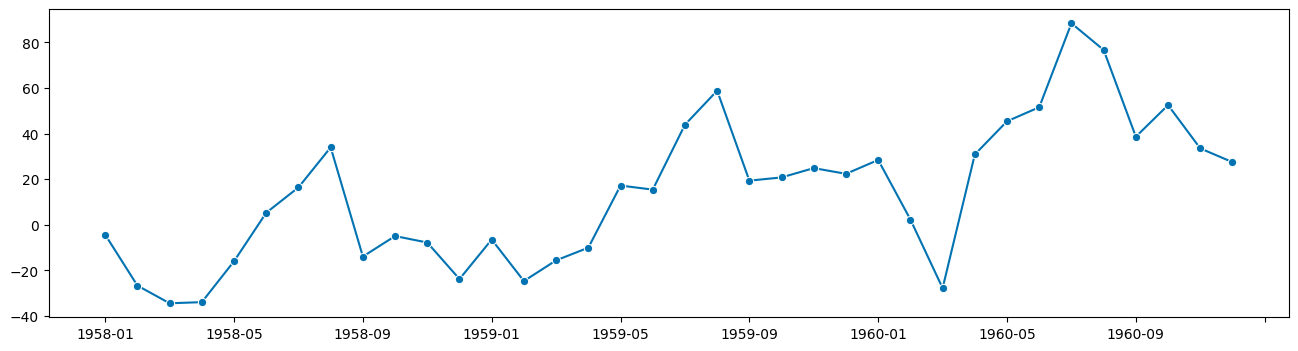

In [ ]:
plot_series(residuals);

**Normality of Residuals**

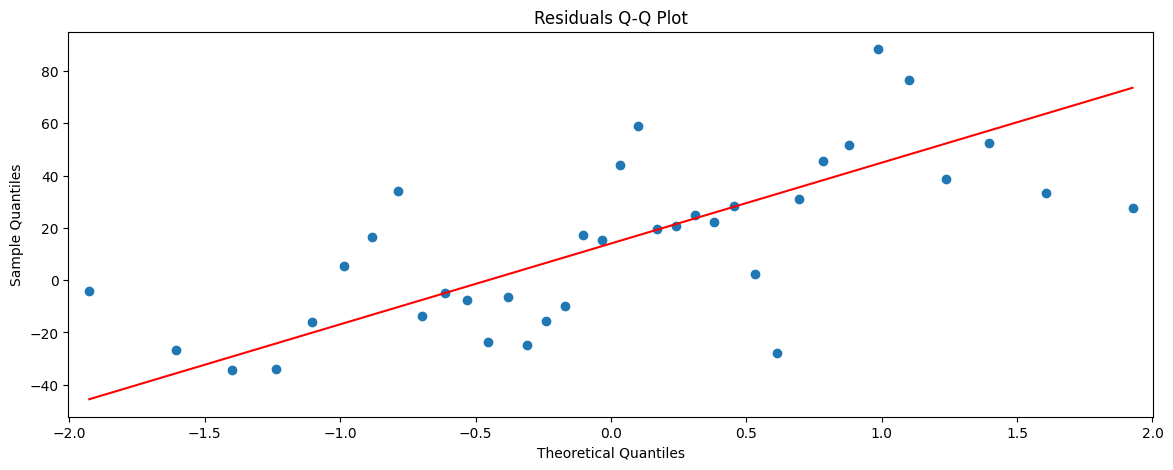

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total Passengers', ylabel='Count'>

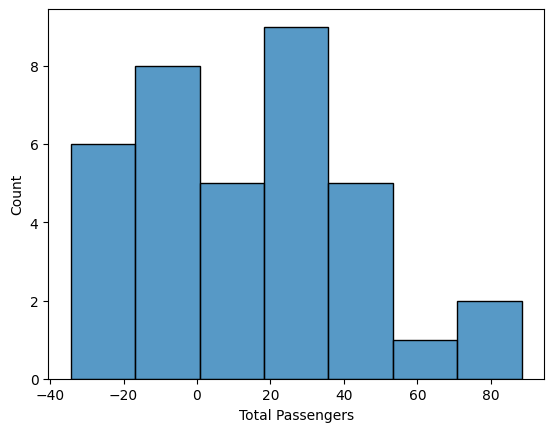

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

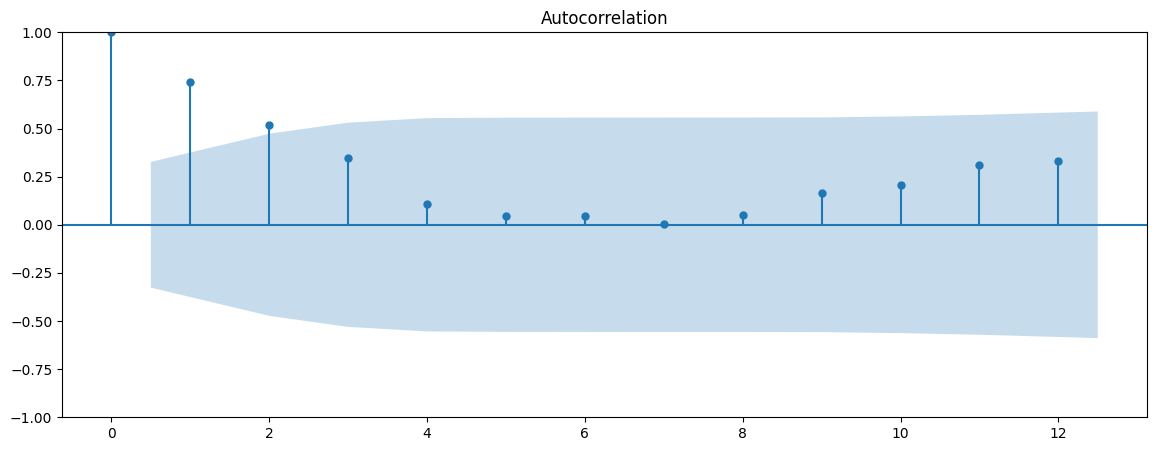

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

6.185457205369252

# TBATS

## Modeling

**Modeling**

In [ ]:
# define TBATS model
tbats_forecaster = TBATS(sp=12)

In [ ]:
# fit forecaster to data
tbats_forecaster.fit(y_train)

TBATS(sp=12)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_tbats = tbats_forecaster.predict(fh=fh)

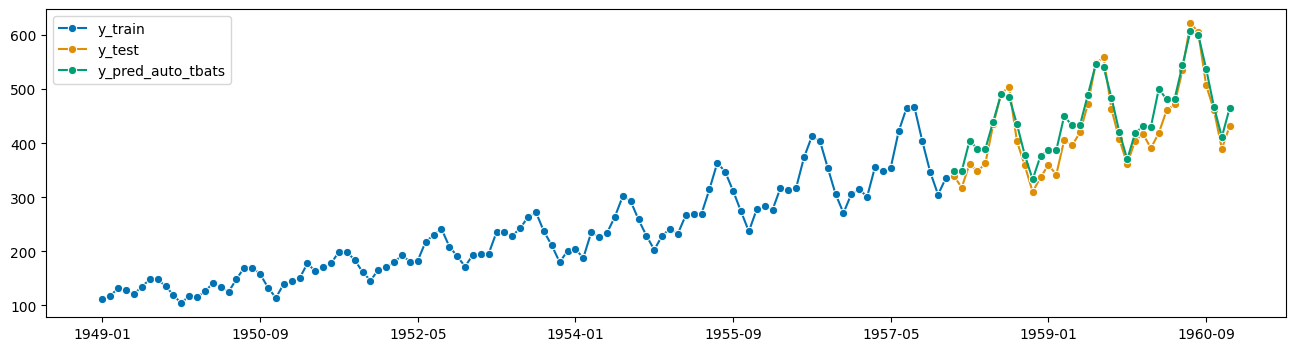

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_auto_tbats"]);

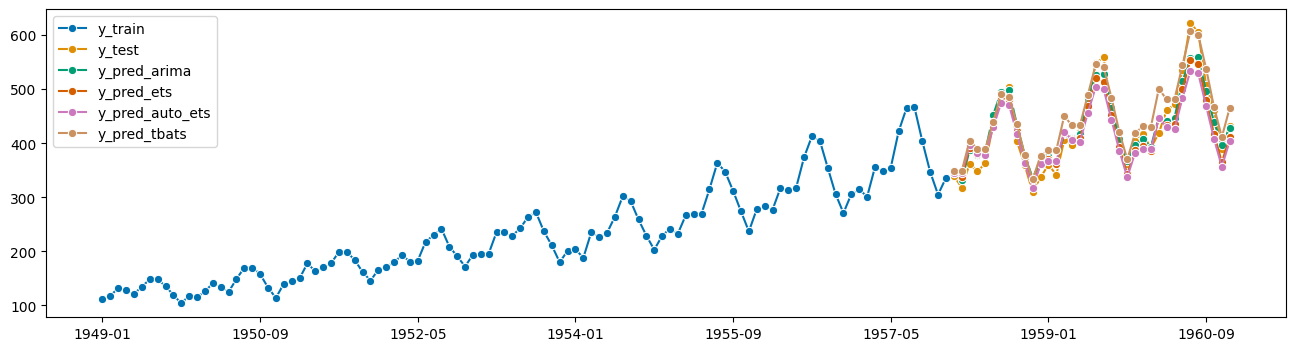

In [ ]:
# plot the forecast result
plot_series(
    y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, y_pred_tbats,
    labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets", "y_pred_tbats"]
);

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_tbats

**Plot Residuals**

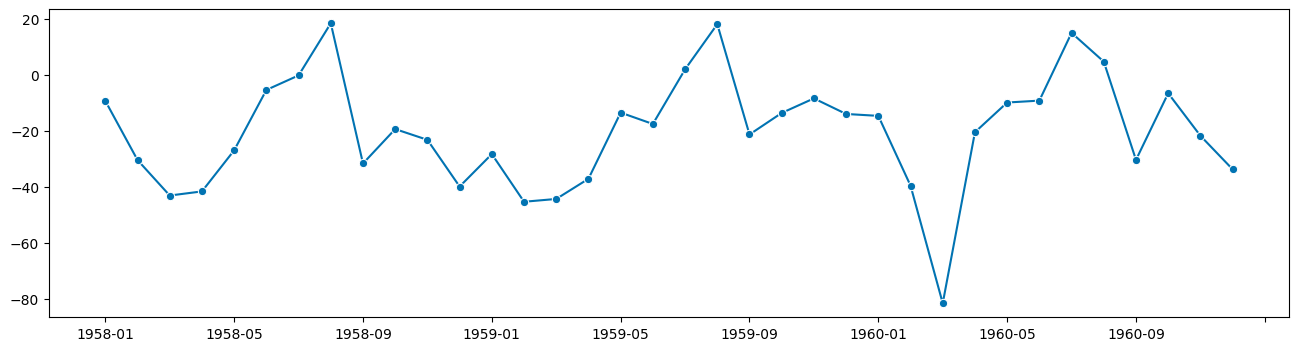

In [ ]:
plot_series(residuals);

**Normality of Residuals**

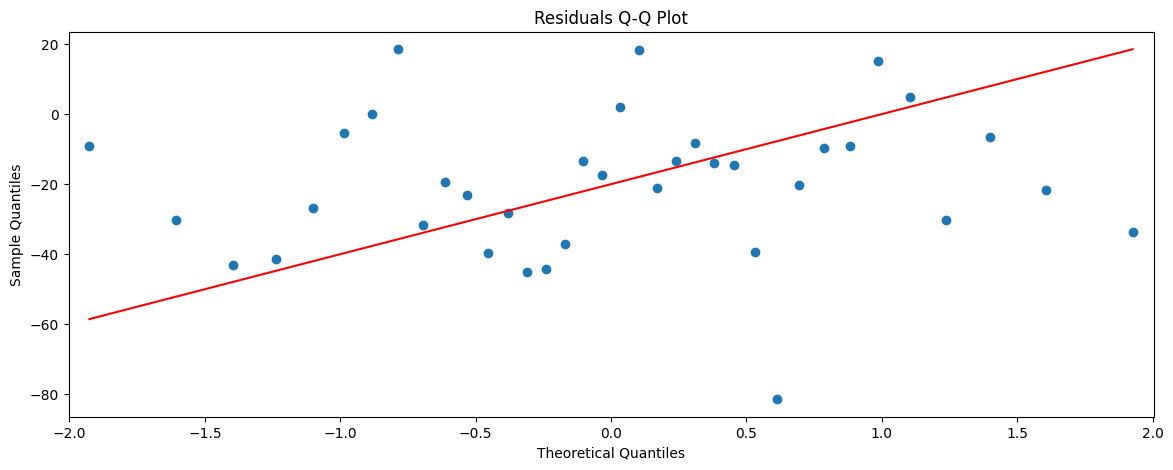

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total Passengers', ylabel='Count'>

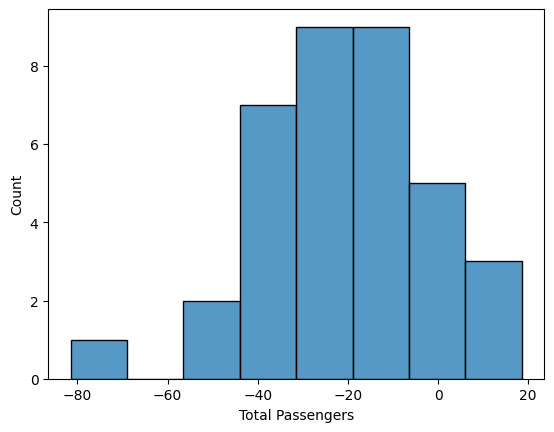

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

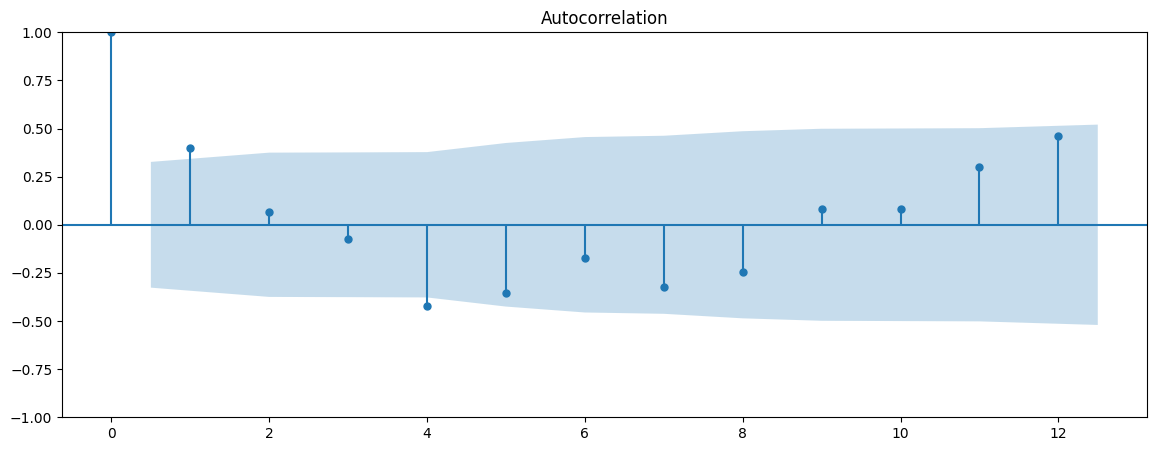

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_tbats) * 100

5.871197440106141

# Prophet

## Modeling

**Re-preprocess Data**

In [ ]:
air_passengers = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/air_passanger_data/AirPassengers.csv")

In [ ]:
# change month column to date type
air_passengers['Month'] = pd.to_datetime(air_passengers['Month'], format="%Y-%m")

In [ ]:
# renaming certain column
air_passengers = air_passengers.rename(columns={
    "#Passengers": "Total Passengers",
    "Month": "Date"
})

In [ ]:
# set Date as index
air_passengers = air_passengers.set_index('Date')
air_passengers.index = pd.DatetimeIndex(air_passengers.index, freq = 'infer')

**Train-Test Split**

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(air_passengers, test_size=36)

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

**Modeling**

In [ ]:
# define Prophet model
prophet_forecaster = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    add_country_holidays = {"country_name": "Australia"}
)

In [ ]:
# fit forecaster to data
prophet_forecaster.fit(y_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmppur73g57/4pppx_3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppur73g57/z2lvt3z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71919', 'data', 'file=/tmp/tmppur73g57/4pppx_3n.json', 'init=/tmp/tmppur73g57/z2lvt3z_.json', 'output', 'file=/tmp/tmppur73g57/prophet_modelnozxdwb6/prophet_model-20230825035332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:53:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'Australia'},
        daily_seasonality=False, seasonality_mode='multiplicative',
        weekly_seasonality=False, yearly_seasonality=True)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_prophet = prophet_forecaster.predict(fh=fh)

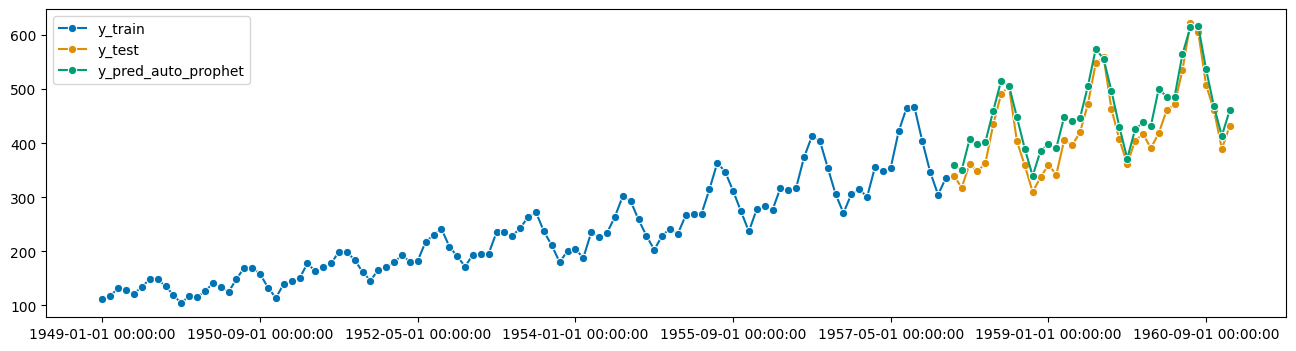

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_prophet, labels=["y_train", "y_test", "y_pred_auto_prophet"]);

**Set New Index Type**

In [ ]:
y_pred_prophet.index = pd.PeriodIndex(y_pred_prophet.index, freq = 'M')
y_train.index = pd.PeriodIndex(y_train.index, freq = 'M')
y_test.index = pd.PeriodIndex(y_test.index, freq = 'M')

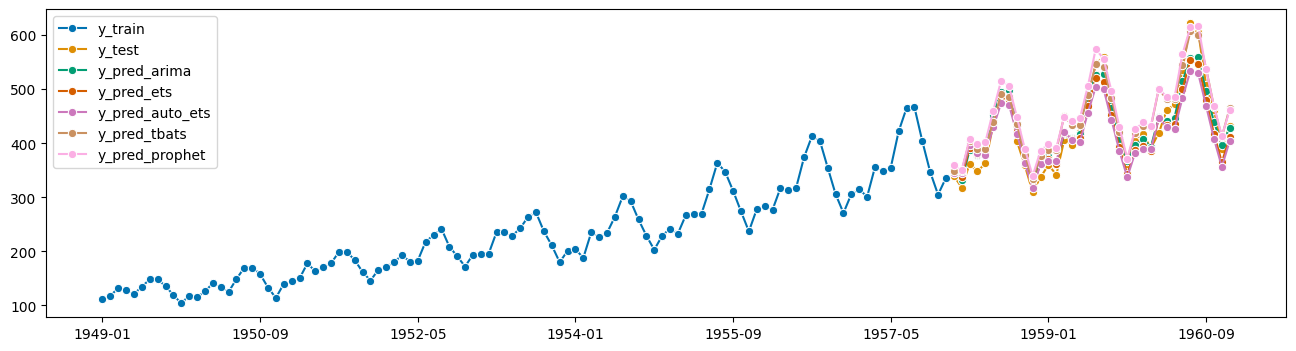

In [ ]:
# plot the forecast result
plot_series(
    y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, y_pred_tbats, y_pred_prophet,
    labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets", "y_pred_tbats", "y_pred_prophet"]
);

## Model Diagnostics

In [ ]:
residuals = y_test - y_pred_prophet.rename(columns={"yhat":"Total Passengers"})

**Plot Residuals**

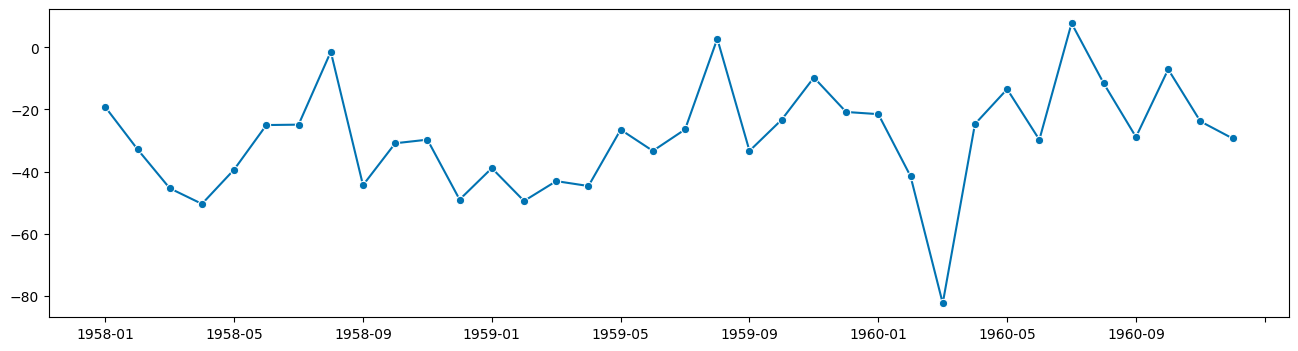

In [ ]:
plot_series(residuals);

**Normality of Residuals**

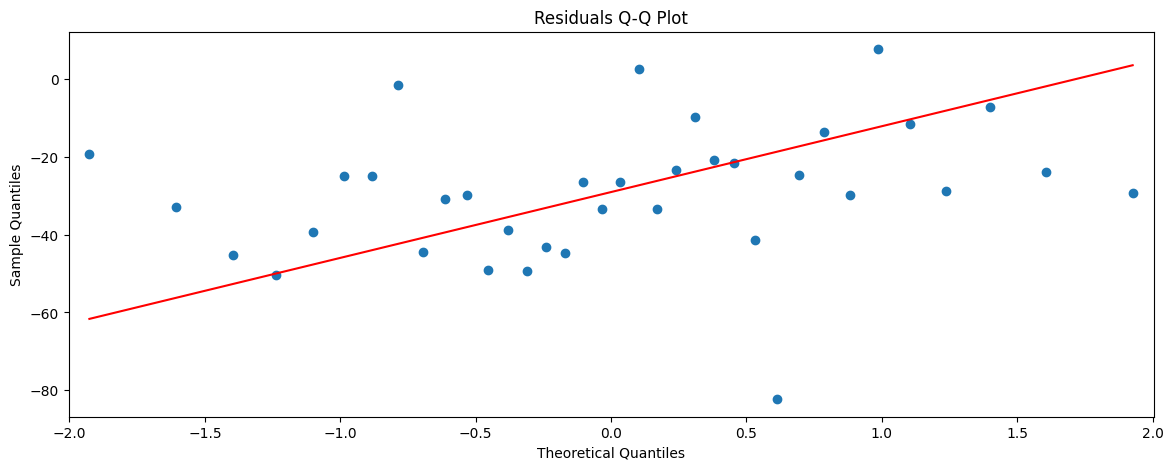

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<Axes: xlabel='Total Passengers', ylabel='Count'>

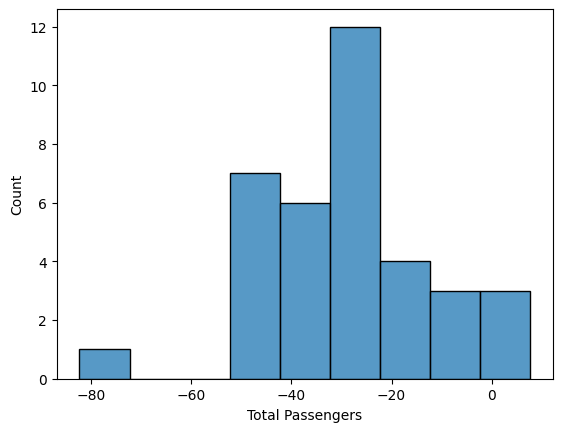

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

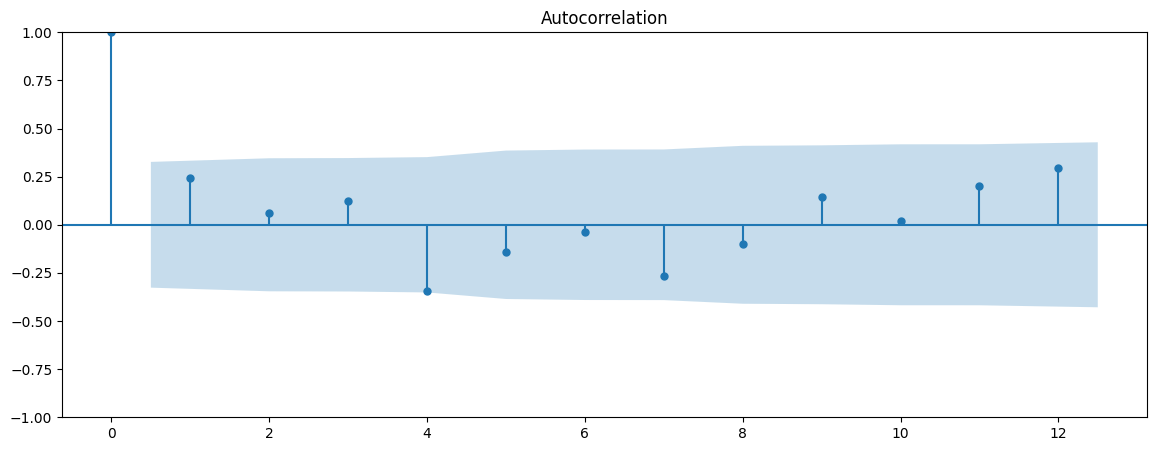

In [ ]:
# ACF plot
plot_acf(
    residuals,
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_prophet) * 100

7.431967082244816

## Task

Do forecasting for Daily Web Visitors data using ARIMA, Holt-Winters, and Prophet to predict number of `unique_visits`. You don't need to use CV for this


In [ ]:
daily_web_visitors = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/daily_website_visitors/daily-website-visitors.csv")

In [ ]:
daily_web_visitors

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499
